In [72]:
# 다음은  2013년 국정원 의심계정의 twitter를 크롤링 파일입니다.
# twitter.txt 파일을
# 1) 형태소 분석하여 twitter.m 파일로 저장(  오타정정, 기본형  )
# 2) twitter.m 파일을 읽어서 워드 클라우드 작성 (최대 2000단어만)

In [91]:
import codecs
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [92]:
readFp = codecs.open("crawlling.txt", "r" , encoding="utf-8")

In [93]:
writeFp = open("crawlling_m.txt" , "w", encoding="utf-8")

In [94]:
twitter = Okt()
i = 0

while True:
    line = readFp.readline()
    if not line: 
        break

    if i % 100 == 0:
        print("current - " + str(i)) #100라인에 한번씩 출력
    i += 1

    malist = twitter.pos(line, norm=True, stem=True)

    for word in malist:
                   # 조사/어미/구두점 등은 대상에서 제외
#         if not word[1] in ["Josa", "Eomi", "Punctuation"]:
#             writeFp.write(word[0] + " ")

        if word[1] in ["Noun"]: # 명사만 추출
            writeFp.write(word[0] + " ")
writeFp.close() 

current - 0
current - 100
current - 200
current - 300
current - 400
current - 500
current - 600
current - 700


In [95]:
writeFp_test = codecs.open("twitter_m.txt", "r" , encoding="utf-8")

In [96]:
data = writeFp_test.read()

In [97]:
wordcloud = WordCloud(max_font_size=200,font_path='c:/Windows/fonts/malgun.ttf',
                      background_color='#FFFFFF',
                      max_words = 2000,
                      colormap = "spring_r",
                      width=1200,height=800).generate(data)

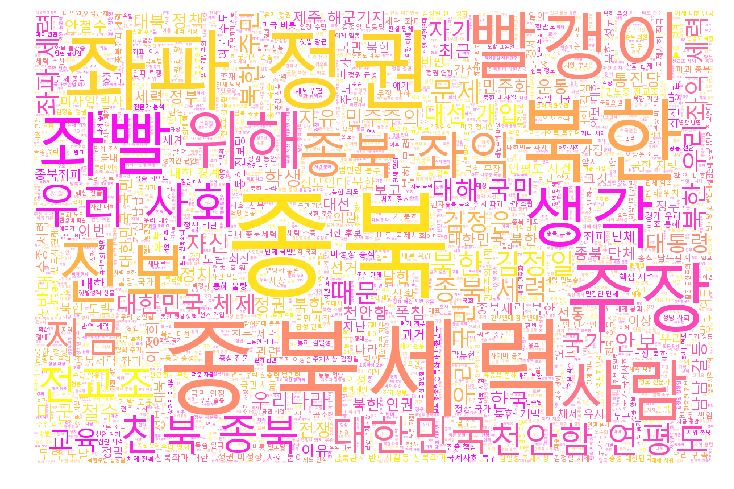

In [98]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')

plt.savefig('wordcloud_image5.png', bbox_inches='tight')
plt.show()